In [1]:
import numpy as np
from IPython.display import display
import sympy as sy
from sympy.physics.quantum.dagger import Dagger
from sympy.solvers import solve

sy.init_printing()  # LaTeX like pretty printing for IPython

In [2]:
def croissant(a_bar_tilde, b_bar_tilde, d_mat):
    """Eat croissant

    Parameters
    ----------
    `a_bar_tilde`: chocolat
    `b_bar_tilde`: beurre
    `d_mat`: olive

    Return:
    `vomit`
    `phy_sy`: matrix phi(z,t)
    `det_phy`: determinant function of det(phi(z,t))
    `sol`: numpy array of solution's to det(phi(z,t))=0

    """
    r = d_mat.shape[0]

    a_sy = sy.Matrix(a_bar_tilde)
    b_sy = sy.Matrix(b_bar_tilde)
    d_sy = sy.Matrix(d_mat)

    z = sy.symbols("z")

    phi_sy = sy.simplify(sy.eye(3) - Dagger(b_bar_tilde) * (z*sy.eye(r) - d_sy).inv() * a_sy)

    det_phi = phi_sy.det()

    sol = solve(det_phi, z)
    sol = np.array([complex(item) for item in sol])

    return phi_sy, det_phi, sol

> Test

In [3]:
a_bar_tilde = np.array([[1j, 2+1j, 3], [4+2*1j, 5, 6]])
b_bar_tilde = np.array([[1, 2, 3], [4, 5+1j, 6]])
d_mat = np.array([[1j, 0], [0, 1j]])

In [4]:
phi_sy, det_phi, sol = croissant(a_bar_tilde, b_bar_tilde, d_mat)

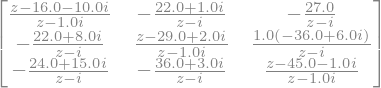

In [5]:
phi_sy

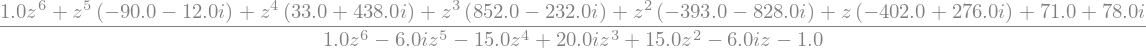

In [6]:
det_phi

In [7]:
sol

array([ 0.86152722+0.80550796j, 89.13847278+7.19449204j])